In [3]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Financial Planner for Emergencies

In [5]:
# Enter the current number of coins for each cryptocurrency asset held in the portfolio here. 1.2 and 5.3 have been used for this analysis.
btc_coins = 1.2
eth_coins = 5.3

In [6]:
# The monthly amount for the member's household income. 12000 has been used for this analysis.
monthly_income=12000

In [7]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [8]:
# Make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18848593,
            "id": 1,
            "last_updated": 1634689449,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1211274938672,
                    "percent_change_1h": 0.20017648970065,
                    "percent_change_24h": 3.13998434767543,
                    "percent_change_7d": 14.0733862382802,
                    "percentage_change_1h": 0.20017648970065,
                    "percentage_change_24h": 3.13998434767543,
                    "percentage_change_7d": 14.0733862382802,
                    "price": 64263.0,
                    "volume_24h": 42533909266
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18848593,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies":

In [9]:
# Make an API call to access the current price ETH
eth_response = response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 117996656,
            "id": 1027,
            "last_updated": 1634689455,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 459044942977,
                    "percent_change_1h": 0.313258261468508,
                    "percent_change_24h": 3.13265200023842,
                    "percent_change_7d": 11.1489129410317,
                    "percentage_change_1h": 0.313258261468508,
                    "percentage_change_24h": 3.13265200023842,
                    "percentage_change_7d": 11.1489129410317,
                    "price": 3888.11,
                    "volume_24h": 17596918057
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 117996656,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [11]:
# Save the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(btc_price)


64263.0


In [12]:
# Save the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(eth_price)


3888.11


In [15]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(btc_value)

77115.59999999999


In [14]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(eth_value)


20606.983


In [16]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)

97722.58299999998


In [20]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [21]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [23]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# The start and end date were set to the prior trading day at the time this code was written.
# Use another date for a current analysis.
start_date = pd.Timestamp("2021-10-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-19", tz="America/New_York").isoformat()


In [33]:
# Use the Alpaca get_barset function to get current closing prices the portfolio as a dataframe.
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1).df

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-10-19 00:00:00-04:00  114.37  114.37  114.16  114.18  3999066  448.92   

                                                            
                            high     low   close    volume  
time                                                        
2021-10-19 00:00:00-04:00  450.7  448.27  450.68  40790864

In [35]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(agg_close_price)


114.18


In [36]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])


# Print the SPY closing price
print(spy_close_price)


450.68


In [38]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)


22836.0


In [40]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


49574.8


In [42]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)


72410.8


In [43]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(total_portfolio)

170133.38299999997


In [45]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[97722.58299999998, 72410.8]


In [50]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,97722.583
stock/bond,72410.800


<AxesSubplot:ylabel='amount'>

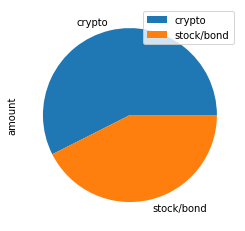

In [54]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind="pie", y="amount")


In [72]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


In [73]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! Your total portfolio is enough of an emergency fund to cover more than three months of your income.")
elif total_portfolio == emergency_fund_value:
    print("Your total portfolio is equal to three months of your income. Congratulations on reaching this important financial goal!")
else:
    amount_emergency_fund_short = "${:.2f}".format(round(emergency_fund_value - total_portfolio, 2))
    print(f"Your total portfolio is less than three months of income. To reach this goal of having enough money for an emergency fund, you need " + amount_emergency_fund_short)

Congratulations! Your total portfolio is enough of an emergency fund to cover more than three months of your income.


## Financial Planner for Retirement

### Forecast 30 year cumulative returns for 60 / 40 split between stocks and bonds.

In [76]:
# Set start and end dates of 3 years back from the current date. Use a different date if rerunning the analysis.
start_date = pd.Timestamp("2018-10-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-19", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [78]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
prices_three_year_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_rows).df


# Display both the first and last five rows of the DataFrame
display(prices_three_year_df.head())
display(prices_three_year_df.tail())

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-19 00:00:00-04:00  104.47  104.55  104.340  104.370  2912850.0   
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2018-10-19 00:00:00-04:00  277.12  279.30  275.47  276.19   86816021  
2018-10-22 00:00:00-04:00  277.00  277.36  274.41  275.06   64990700  
2018-10-23 00:00:00-04:00  270.94  274.87  268.61  273.54  113790534  
2018-10-24 00:00:00-04:00  273.33  273.76  264.70  265.22  130172487  
2018-10-25 00:00:00-04:00  267.37  271.81  266.23  270.14   97215770

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2021-10-13 00:00:00-04:00  114.43  114.6400  114.415  114.61  5301180.0   
2021-10-14 00:00:00-04:00  114.70  114.8496  114.630  114.84  3540673.0   
2021-10-15 00:00:00-04:00  114.61  114.6300  114.510  114.56  3829388.0   
2021-10-18 00:00:00-04:00  114.33  114.5600  114.250  114.49  5145953.0   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.160  114.18  3999066.0   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-10-13 00:00:00-04:00  434.71  436.05  431.54  435.13  63943229  
2021-10-14 00:00:00-04:00  439.08  442.66  438.58  442.47  59812568  
2021-10-15 00:00:00-04:00  444.76  446.26  444.09  445.83  55980388  
2021-10-18 00:00:00-04:00  443.97  447.55  443.27  447.22  51994387  
2021-10-19 00:00:00-04:00  448.92  450.70  448.27  450.68  40790864

In [79]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights are here split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirtyyear_6040 = MCSimulation(
    portfolio_data  = prices_three_year_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 30)

# Review the simulation input data
MC_thirtyyear_6040.portfolio_data.head()


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-19 00:00:00-04:00  104.47  104.55  104.340  104.370  2912850.0   
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-19 00:00:00-04:00          NaN  277.12  279.30  275.47  276.19   
2018-10-22 00:00:00-04:00    -0.000192  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   

                                                   
                              volume daily_return  
time                                               
2018-10-19 00:00:00-04:00   86816021          NaN  
2018-10-22 00:00:00-04:00   64990700    -0.004091  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551

In [80]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear_6040.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000926,1.012972,1.019805,1.001141,1.007738,1.005279,1.009653,0.996460,1.010431,0.994897,...,1.000200,1.001681,1.001335,1.006670,0.999726,0.987837,1.012181,1.002639,1.014398,0.996010
2,1.003038,1.014897,1.021643,1.010635,1.009506,1.019896,1.009723,1.005831,0.999333,0.990565,...,1.011991,0.998214,0.997879,1.022285,1.001034,0.998123,1.019739,1.016027,1.009293,0.988719
3,1.003563,1.008421,1.026839,0.998817,1.000206,1.016963,1.019753,1.012114,1.002148,0.994840,...,1.020208,0.997273,0.994567,1.001099,1.001009,1.003357,1.009746,0.996269,1.012551,0.997948
4,0.987016,0.994856,1.026691,0.998977,0.993373,1.020005,1.033328,1.009669,0.991218,0.986754,...,1.029205,0.996940,0.988049,0.991236,0.990973,0.994863,1.005706,1.000453,1.005717,1.008368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.039197,93.818561,20.741315,36.231106,32.414815,23.477601,58.542275,35.017298,27.870039,18.915216,...,17.306696,17.397196,18.445521,27.493104,12.853870,73.284178,28.566413,19.441114,12.024532,42.270139
7557,23.159017,92.047130,20.906643,36.174546,32.080347,23.559590,57.745802,35.497762,27.888477,19.016344,...,17.258503,17.239608,18.306005,27.242804,12.829684,73.450928,28.648515,19.294218,11.897336,41.661513
7558,22.908850,92.421186,20.935257,35.669168,31.523859,23.452299,57.785482,35.565568,27.681552,19.347869,...,17.386631,17.419197,18.182379,27.491410,12.769929,73.023724,28.198764,19.538602,11.990420,41.137999
7559,22.989378,91.708768,20.806974,36.255591,31.880509,23.474210,57.657968,36.027266,27.639103,19.272438,...,17.365421,17.382350,18.392275,27.147042,13.011635,72.742897,28.374881,19.554715,11.910022,41.510044


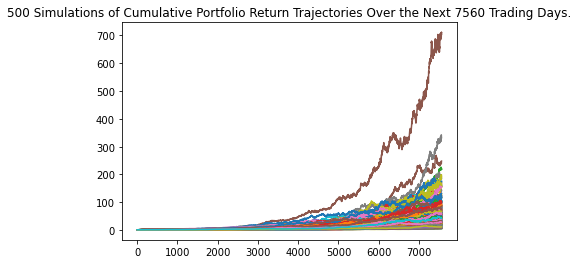

In [85]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
line_plot_thirtyyear_6040 = MC_thirtyyear_6040.plot_simulation()


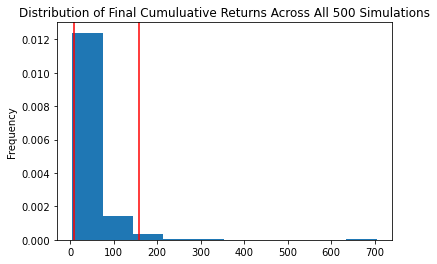

In [86]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
distribution_plot_thirtyyear_6040 = MC_thirtyyear_6040.plot_distribution()

In [88]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirtyyear_6040_table = MC_thirtyyear_6040.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(thirtyyear_6040_table)

count           500.000000
mean             45.099873
std              47.309009
min               4.696776
25%              20.629495
50%              32.776762
75%              55.279187
max             704.354411
95% CI Lower      8.606110
95% CI Upper    158.761435
Name: 7560, dtype: float64


### Analysis of 95% confidence interval for future portfolio performance if invested in 60% stocks, 40 % bonds.

In [91]:
# Print the current balance of the stock and bond portion of the members portfolio
print("The current stock and bond portion of the members portfolio is: $" + "${:.2f}".format(round(total_stocks_bonds, 2)))

The current stock and bond portion of the members portfolio is: $72410.80


In [104]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = "{:.2f}".format(round(thirtyyear_6040_table[8] * total_stocks_bonds, 2))
ci_upper_thirty_cumulative_return = "{:.2f}".format(round(thirtyyear_6040_table[9] * total_stocks_bonds, 2))

# Print the result
print(f"There is a 95% chance that an the current portfolio value if invested in a portfolio with a 60/40 portfolio of stocks to bonds over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that an the current portfolio value if invested in a portfolio with a 60/40 portfolio of stocks to bonds over the next 30 years will end within in the range of $623175.28 and $11496042.52.


### Alternative Forecast: Cumulative Returns in 10 Years with 80 / 20 stock / bonds ratio.

Here an alternate simulation is run to look at possible results if the member invested into 80% stocks and 20% bonds, to see if this would give the member a chance to retire in 10 years.


In [94]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear_8020 = MCSimulation(
    portfolio_data  = prices_three_year_df,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252 * 10)

# Review the simulation input data
MC_tenyear_8020.portfolio_data.head()


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-19 00:00:00-04:00  104.47  104.55  104.340  104.370  2912850.0   
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-19 00:00:00-04:00          NaN  277.12  279.30  275.47  276.19   
2018-10-22 00:00:00-04:00    -0.000192  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   

                                                   
                              volume daily_return  
time                                               
2018-10-19 00:00:00-04:00   86816021          NaN  
2018-10-22 00:00:00-04:00   64990700    -0.004091  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551

In [95]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear_8020.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009326,0.987776,1.008070,1.001229,0.997991,1.007063,1.014929,0.987929,1.021653,0.999685,...,1.000597,1.013731,0.997473,1.020032,1.006725,1.007273,0.979269,0.994568,0.987748,1.007479
2,1.021621,0.985797,0.999181,1.004730,1.000653,1.000025,1.018436,0.995160,1.051160,1.018517,...,1.010510,1.029636,0.998333,1.010676,1.006396,1.009252,0.979671,1.011133,0.981288,0.994345
3,1.028092,0.976040,0.995235,1.009731,0.984123,0.990106,1.015899,0.997543,1.071719,1.016439,...,1.015569,1.015336,1.008491,1.023627,1.021822,1.018141,0.985191,1.018913,0.983824,0.991339
4,1.036015,0.984010,1.011660,1.026537,0.986841,0.982391,1.017640,0.990330,1.066381,1.013097,...,1.016850,1.018046,1.030193,1.009154,1.039771,1.019236,0.980704,1.018966,0.976813,0.977600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.778331,2.711139,3.286736,4.388236,14.410428,4.894257,6.613596,2.255662,0.871946,3.534851,...,1.420682,3.167244,3.874008,2.695471,2.589579,3.871325,3.346570,4.803900,3.344084,4.045735
2517,7.903754,2.672783,3.277332,4.450891,14.268048,4.880240,6.711490,2.262634,0.852114,3.560262,...,1.461099,3.180057,3.951923,2.700004,2.584288,3.877789,3.326952,4.873744,3.405631,4.056145
2518,7.952455,2.682030,3.321050,4.432630,13.923167,4.884878,6.693354,2.251758,0.859021,3.585070,...,1.483841,3.223335,3.878165,2.614346,2.591772,3.854651,3.363151,4.881115,3.381511,3.977434
2519,8.089250,2.653968,3.271891,4.375289,13.797266,4.835683,6.809263,2.251973,0.861615,3.579930,...,1.443246,3.193210,3.923376,2.595036,2.614927,3.883584,3.372724,4.852722,3.347167,3.961729


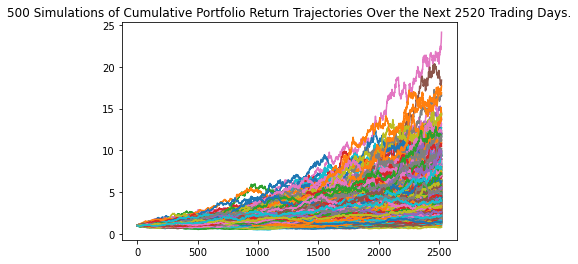

In [96]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
line_plot_tenyear_8020 = MC_tenyear_8020.plot_simulation()


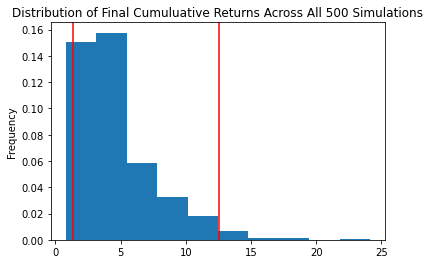

In [97]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
distribution_plot_tenyear_8020 = MC_tenyear_8020.plot_distribution()


In [98]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
tenyear_8020_table = MC_tenyear_8020.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(tenyear_8020_table)

count           500.000000
mean              4.692604
std               3.104501
min               0.794893
25%               2.631188
50%               3.691891
75%               5.761869
max              24.135436
95% CI Lower      1.364862
95% CI Upper     12.550710
Name: 2520, dtype: float64


### Analysis:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [99]:
# Print the current balance of the stock and bond portion of the members portfolio
print("The current stock and bond portion of the members portfolio is: $" + "{:.2f}".format(round(total_stocks_bonds, 2)))


The current stock and bond portion of the members portfolio is: $72410.80


In [106]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = "{:.2f}".format(round(tenyear_8020_table[8] * total_stocks_bonds, 2))
ci_upper_ten_cumulative_return = "{:.2f}".format(round(tenyear_8020_table[9] * total_stocks_bonds, 2))

# Print the result
print(f"There is a 95% chance that an the current portfolio value if invested in a portfolio with an 80/20 portfolio of stocks to bonds over the next 10 years will end within in the range of ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


There is a 95% chance that an the current portfolio value if invested in a portfolio with an 80/20 portfolio of stocks to bonds over the next 10 years will end within in the range of $98830.73 and $908806.95.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Analysis:** This depends on where the member lives and what expenses they expect to be paying monthly, and the retirement length. The possibility of future living expense increases could also be significant. Early retirement would mean the funds have to last longer, however if the amount invested continues to grow at a rate faster than the expenses paid, it would be enough. For this range of outcomes, the member would need a very modest spending plan for retirement in order to be able to retire within ten years on current savings, and also get a result on the high end of the expected values.

One shortfall of this analysis is only stock prices are taken into account, not dividends over time which could be reinvested. Another shortfall is additional savings over the 10 or 30 year period put into investments are not taken into account in this analysis.